# Questionário 4
nome: Vinicio Yusuke Hayashibara 


nUSP: 13642797


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

## Q1. Calcule a modularidade para a rede Jazz usando método fastgreedy.Use:

G= nx.read_edgelist("data/jazz.txt", nodetype=int)

G = G.to_undirected()

G.remove_edges_from(nx.selfloop_edges(G))

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

G = G.subgraph(Gcc[0])

G = nx.convert_node_labels_to_integers(G, first_label=0)

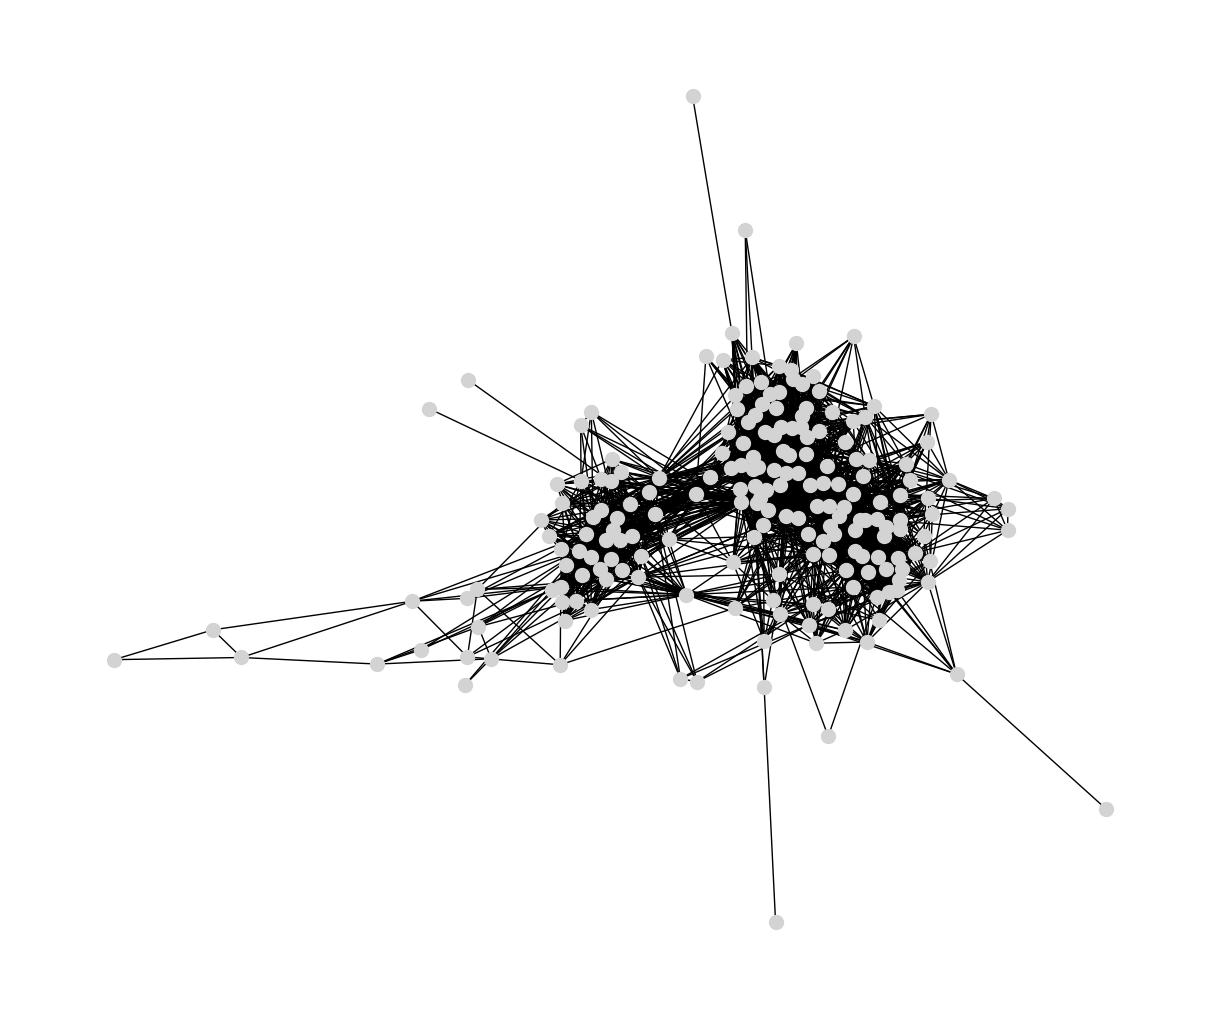

In [17]:
G = nx.read_edgelist('/Users/yusukehayashibara/Downloads/data2Q/jazz.txt')
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=100, with_labels=False)

In [21]:
G = G.to_undirected()

G.remove_edges_from(nx.selfloop_edges(G))

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

G = G.subgraph(Gcc[0])

G = nx.convert_node_labels_to_integers(G, first_label=0)

In [23]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
for k in range(0,len(communities)):
    print('Community',k,':', sorted(communities[k]))

Community 0 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community 1 : [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community 2 : [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community 3 : [186, 187, 188]


In [78]:
def modularity(G, communities):
    A = nx.adjacency_matrix(G).todense()
    M = G.number_of_edges()
    Q = 0

    for community in communities:
        for i in community:
            ki = G.degree(i)
            for j in community:
                kj = G.degree(j)
                Q += A[i, j] - (ki * kj) / (2 * M)

    Q = Q / (2 * M)
    return Q


In [31]:
print("Modularity Q = ", modularity(G,communities))

Modularity Q =  0.4389078153753756


## Q2. Calcule a modularidade para a rede Jazz usando método Louvain. Use:

G= nx.read_edgelist("data/jazz.txt", nodetype=int)

G = G.to_undirected()

G.remove_edges_from(nx.selfloop_edges(G))

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

G = G.subgraph(Gcc[0])

G = nx.convert_node_labels_to_integers(G, first_label=0)

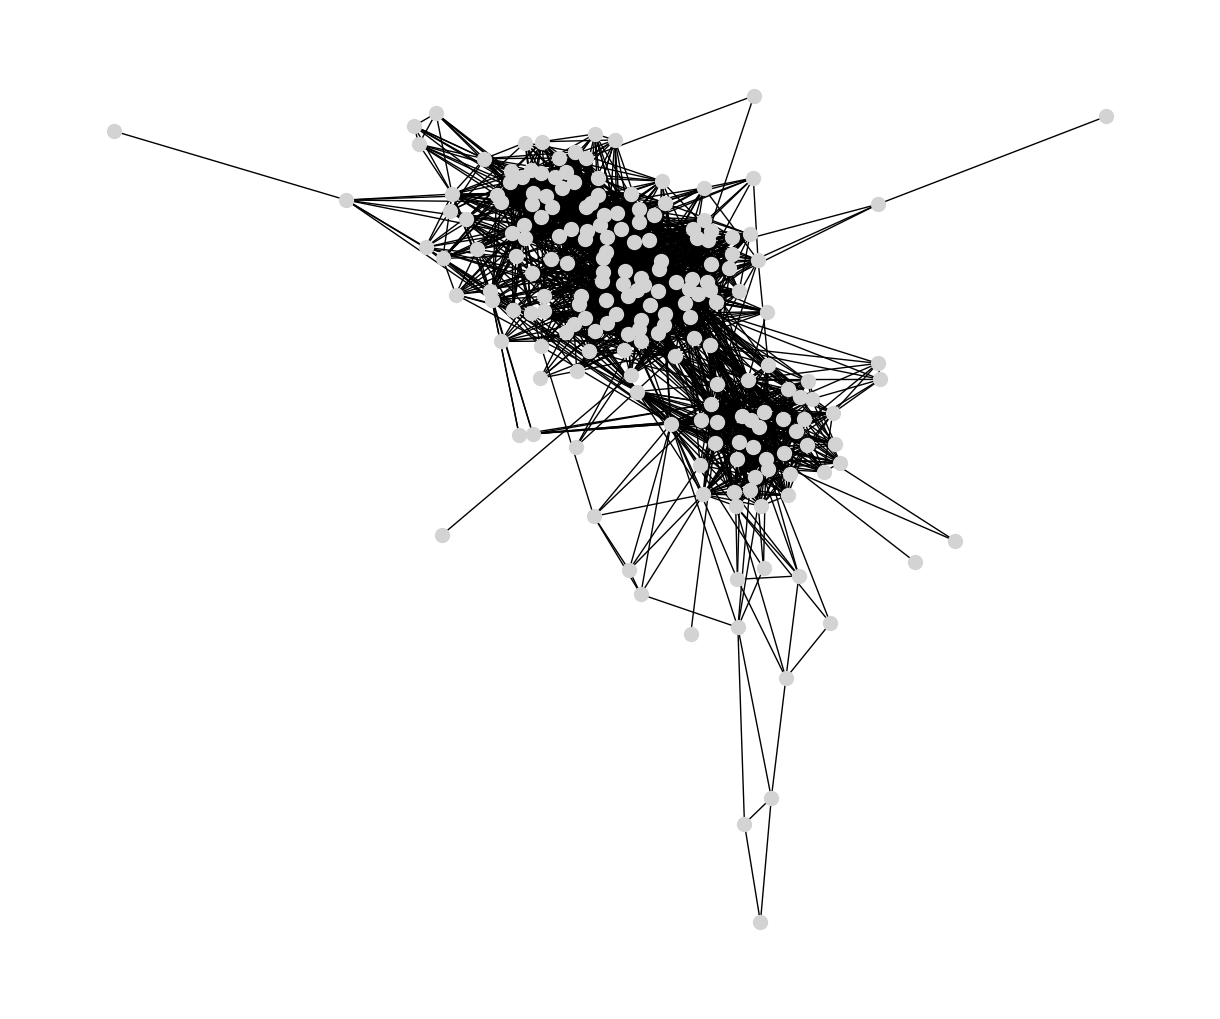

In [3]:
G = nx.read_edgelist('/Users/yusukehayashibara/Downloads/data2Q/jazz.txt')
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=100, with_labels=False)

In [5]:
G = G.to_undirected()

G.remove_edges_from(nx.selfloop_edges(G))

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

G = G.subgraph(Gcc[0])

G = nx.convert_node_labels_to_integers(G, first_label=0)

In [7]:
import community as community_louvain

Vemos a partição das comunidades utilizando louvain

In [9]:
partitions =community_louvain.best_partition(G)

In [15]:
modularity = community_louvain.modularity(partitions, G)
print("Modularity: ", modularity)

Modularity:  0.43903323826198726


## Q3. Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para 𝜇=0.05,𝜇=0.1,𝜇=0.2. Use o código a seguir para gerar as redes. Use o algoritmo de Louvain.

N = 128

tau1 = 3

tau2 = 1.5

k =16


minc = 32

maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

In [40]:
# Para mu = 0.05

In [36]:
N = 128

tau1 = 3

tau2 = 1.5

k =16

minc = 32

maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.05, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

In [42]:
partitions =community_louvain.best_partition(G)
modularity = community_louvain.modularity(partitions, G)
print("Modularity: ", modularity)

Modularity:  0.6507990505232747


In [44]:
# Para mu = 0.1

In [46]:
N = 128

tau1 = 3

tau2 = 1.5

k =16

minc = 32

maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.1, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

In [48]:
partitions =community_louvain.best_partition(G)
modularity = community_louvain.modularity(partitions, G)
print("Modularity: ", modularity)

Modularity:  0.549582070125871


In [50]:
# Para mu = 0.2

In [52]:
N = 128

tau1 = 3

tau2 = 1.5

k =16

minc = 32

maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.2, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

In [54]:
partitions =community_louvain.best_partition(G)
modularity = community_louvain.modularity(partitions, G)
print("Modularity: ", modularity)

Modularity:  0.45039339078678164


## Q4. Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para 𝜇=0.05,𝜇=0.2,𝜇=0.4. Use o código a seguir para gerar as redes. Use o algoritmo fastgreedy.

N = 128

tau1 = 3

tau2 = 1.5

k =16

minc = 32

maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)

In [60]:
# Para mu = 0.05

In [58]:
N = 128

tau1 = 3

tau2 = 1.5

k =16

minc = 32

maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.05, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)



In [70]:
communities = list(greedy_modularity_communities(G))
for k in range(0,len(communities)):
    print('Community',k,':', sorted(communities[k]))

Community 0 : [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123]
Community 1 : [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]
Community 2 : [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community 3 : [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]


In [80]:
Q = modularity(G, communities)
print("Modularity Q = ", Q)

Modularity Q =  0.6365829660391176


In [98]:
# Para mu = 0.2

In [90]:
N = 128

tau1 = 3

tau2 = 1.5

k =16

minc = 32

maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.2, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)



In [92]:
communities = list(greedy_modularity_communities(G))
for k in range(0,len(communities)):
    print('Community',k,':', sorted(communities[k]))

Community 0 : [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 123, 124]
Community 1 : [5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 85, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126]
Community 2 : [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127]
Community 3 : [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 94, 101, 107, 110, 113, 115, 118]


In [94]:
Q = modularity(G, communities)
print("Modularity Q = ", Q)

Modularity Q =  0.42940634881270434


In [96]:
# Para mu = 0.4

In [106]:
N = 128

tau1 = 3

tau2 = 1.5

k =16

minc = 32

maxc = 32

G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = 0.4, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)



In [108]:
communities = list(greedy_modularity_communities(G))
for k in range(0,len(communities)):
    print('Community',k,':', sorted(communities[k]))

Community 0 : [0, 2, 8, 10, 13, 14, 15, 16, 17, 18, 20, 27, 29, 32, 33, 34, 35, 36, 41, 42, 44, 46, 48, 49, 53, 54, 56, 59, 61, 63, 64, 73, 79, 80, 82, 83, 86, 95, 96, 99, 103, 110, 111, 118, 120, 123]
Community 1 : [1, 4, 7, 9, 19, 21, 24, 31, 38, 39, 47, 51, 57, 65, 66, 69, 70, 71, 72, 74, 75, 88, 90, 91, 92, 93, 97, 98, 100, 101, 102, 106, 107, 108, 112, 114, 116, 117, 122, 125]
Community 2 : [3, 5, 6, 11, 23, 25, 26, 28, 37, 40, 45, 50, 52, 55, 58, 60, 67, 68, 76, 77, 81, 85, 89, 94, 104, 109, 115, 121, 124, 126]
Community 3 : [12, 22, 43, 62, 78, 105, 113, 119, 127]
Community 4 : [30, 84, 87]


In [110]:
Q = modularity(G, communities)
print("Modularity Q = ", Q)

Modularity Q =  0.1559878673719028
